https://www.kaggle.com/datasets/manjitbaishya001/la-crime-data-2010-to-2023

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [3]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    # df = pd.read_csv(dataset[year], chunksize=chanksize, compression='gzip')

In [4]:
file_name = "Data/[6]la_crime_2010_to_2023.zip"
read_file(file_name)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,NaN,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116,16.0
2993429,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,NaN,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915,12.0
2993430,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,NaN,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485,1.0
2993431,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,NaN,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487,9.0


In [5]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [6]:
file_name = "Data/[6]la_crime_2010_to_2023.zip"
dataset = read_file(file_name)
output_file = "результаты_6.json"
get_memory_stat_by_column(dataset, output_file)

In [7]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [8]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [9]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [10]:
converted_obj = opt_obj(dataset)

2490.11 MB
154.16 MB


In [11]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [12]:
converted_int = opt_int(dataset)

137.03 MB
54.24 MB
            before   after
DR_NO        int64  uint32
TIME OCC     int64  uint16
Rpt Dist No  int64  uint16
Part 1-2     int64   uint8
Crm Cd       int64  uint16
Vict Age     int64   int64


In [13]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [14]:
converted_float = opt_float(dataset)

228.38 MB
114.19 MB
                 before    after
AREA            float64  float32
Premis Cd       float64  float32
Weapon Used Cd  float64  float32
Crm Cd 1        float64  float32
Crm Cd 2        float64  float32
Crm Cd 3        float64  float32
Crm Cd 4        float64  float32
LAT             float64  float32
LON             float64  float32
AREA            float64  float32


In [15]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

2855.52 MB
322.59 MB


In [17]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [16]:
need_column = dict()
column_names = ['Rpt Dist No', 'Vict Age', 'TIME OCC',
           'AREA', 'AREA NAME', 'Crm Cd Desc',
           'Vict Sex', 'Premis Desc', 'Status', 'LOCATION']

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_6.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_6.csv', mode='a', header=has_header)
    has_header = False

Rpt Dist No:uint16
Vict Age:int64
TIME OCC:uint16
AREA:float32
AREA NAME:category
Crm Cd Desc:category
Vict Sex:category
Premis Desc:category
Status:category
LOCATION:category
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.99 MB
11.82 MB


In [18]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_6.json")

dataset = pd.read_csv("df_6.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 10 columns):
 #   Column       Dtype   
---  ------       -----   
 0   TIME OCC     uint16  
 1   AREA NAME    category
 2   Rpt Dist No  uint16  
 3   Crm Cd Desc  category
 4   Vict Age     int64   
 5   Vict Sex     category
 6   Premis Desc  category
 7   Status       category
 8   LOCATION     category
 9   AREA         float32 
dtypes: category(6), float32(1), int64(1), uint16(2)
memory usage: 86.5 MB


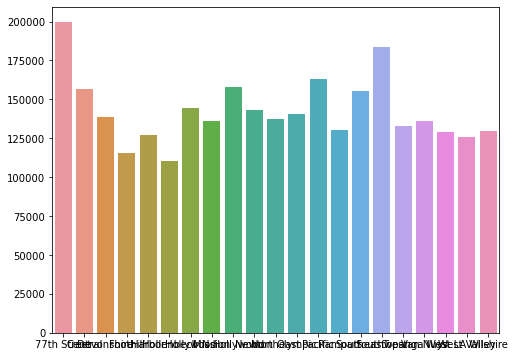

In [19]:
# График столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.countplot(x='AREA NAME', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

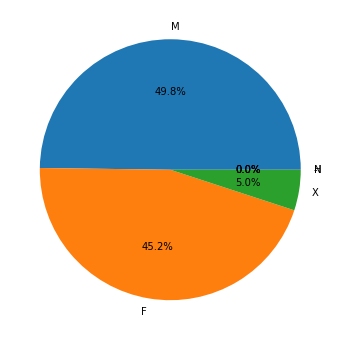

In [20]:
# График круговой диаграммы
plt.figure(figsize=(8, 6))
dataset['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('')
plt.show()

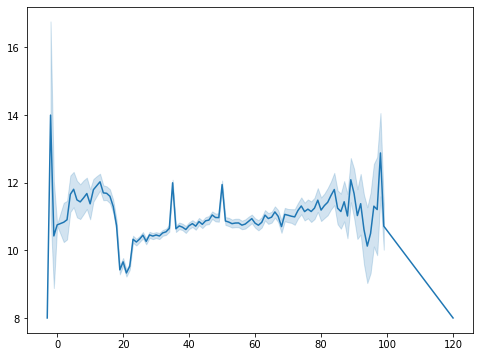

In [21]:
# Линейный график
plt.figure(figsize=(8, 6))
sns.lineplot(x='Vict Age', y='AREA', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

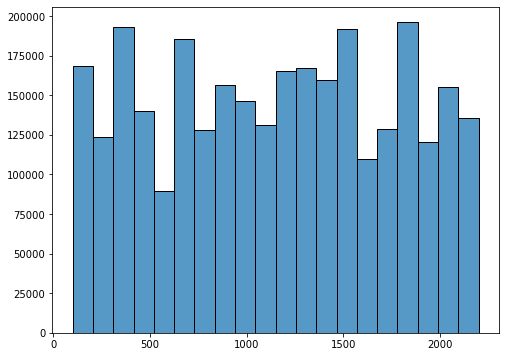

In [22]:
# Гистограмма 
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Rpt Dist No'], bins=20)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

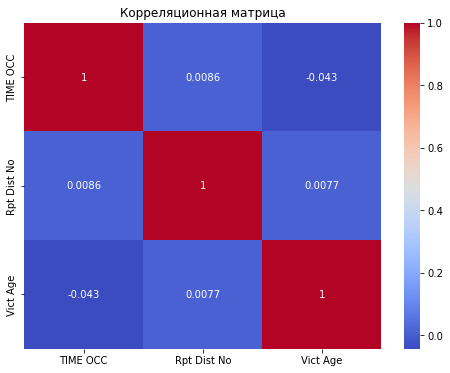

In [23]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['TIME OCC', 'Rpt Dist No', 'Vict Age']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()